# Optimization
## Homework 3

_Jordan Saethre_

_September 29, 2020_

### Problem 1
(Beck Exercise 3.1) Let $A \in \mathbb R^{m \times n}$, $b \in \mathbb R^m$, $L \in \mathbb R^{p\times n}$, and $\lambda \in \mathbb R_{++}$. Consider the regularized least squares (RLS) problem 

$$ \min_{x \in \mathbb R^n} \ \| Ax-b \|^2 + \lambda \| L x \|^2 $$

Show that the RLS problem has a unique solution if and only if $\textrm{Null}(A) \cap \textrm{Null}(L) = \{ 0 \}$. 

Here, for a matrix $B$, $\textrm{Null}(B)$ denotes the null space of $B$, $\{x \colon Bx = 0\}$. 

**Proof**

The Regularized Least Squares problem can be re-written as

$$\min_{x \in \mathbb R^n} \left(x^t(A^tA + \lambda L^tL)x - 2b^tAx + ||b||^2\right)$$

The hessian of this objective function is $2(A^tA + \lambda L^tL)$. 

If $A^tA + \lambda L^tL \succ 0 $ then the solution is 

$$x^* = (A^tA + \lambda L^tL)^{-1}A^tb$$

For $A^tA + \lambda L^tL \succ 0 $ we need

$$
x^t(A^tA + \lambda L^tL)x > 0 \ \ \forall x \neq 0
$$

$$
x^t(A^tA + \lambda L^tL)x = x^tA^tAx + \lambda x^tL^tLx = ||Ax||^2 + \lambda ||Bx||^2 
$$

This last expression can only be strictly greater than zero if $\textrm{Null}(A) \cap \textrm{Null}(L) = \{ 0 \}$. 

The reverse implication is trivial. If $\textrm{Null}(A) \cap \textrm{Null}(L) = \{ 0 \}$ then clearly $||Ax||^2 + \lambda ||Bx||^2 > 0$ for all nonzero $x$.

[]

### Problem 2 
(Beck Exercise 3.2) Generate 30 random points for $y = 2x^2-3x + 1 + 0.05*randn(size(x))$. Find the quadratic function that best fits the points in the least squares sense. Indicate what are the parameters a,b,c found by the least squares solution and plot the points along the derived quadratic function.

In [1]:
import numpy as np
from numpy.linalg import norm

In [2]:
m = 30
s = np.linspace(0,1,m)
t = 3*s**2 - 3*s + 1 + 0.05*np.random.randn(s.shape[0])

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

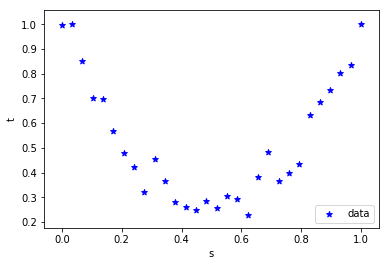

In [4]:
plt.scatter(s,t,c='b',marker='*',label='data')

plt.legend(numpoints=1,loc=4)
plt.xlabel('s')
plt.ylabel('t')
plt.show()

In [5]:
ones = np.ones(s.shape[0])
s_sq = s**2

In [6]:
A = np.stack((ones,s,s_sq), axis = -1)
print(A.shape)

x = np.linalg.lstsq(A,t,rcond=None)[0]
print(x.shape)
print('a: ', str(x[0]))
print('b: ', str(x[1]))
print('c: ', str(x[2]))

(30, 3)
(3,)
a:  1.0210463499755156
b:  -3.0233891785501417
c:  2.9980502547215084


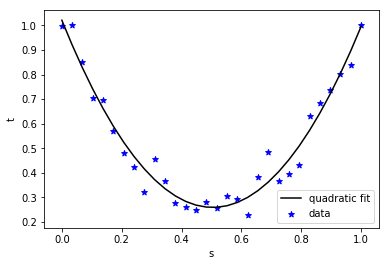

In [7]:
plt.scatter(s,t,c='b',marker='*',label='data')
plt.plot(s,x[0]+x[1]*s+x[2]*s**2,c='k',label='quadratic fit')

plt.legend(numpoints=1,loc=4)
plt.xlabel('s')
plt.ylabel('t')
plt.show()

### Problem 3

(Beck Exercise 3.3) Write a function *[x,r] = circle_fit(A)* whose input is an $n \times m$ matrix $A$, the columns of $A$ are the $m$ vectors in $\mathbb R^n$ to which a circle should be fitted. The call to this function will be of the form

[x,r] = circle_fit(A)

The output $(x,r)$ is the optimal solution of (3.6)

$$\min_{x \in \mathbb R^n, r \in \mathbb R_+} \sum_{i = 1}^m (||x-a_i||^2 - r^2)^2$$

Use the code in order to find the best circle fit in the sense of (3.6) of the 5 points:

$$a_1  = \begin{pmatrix} 0 \\ 0 \end{pmatrix}, \quad
a_2  = \begin{pmatrix} 0.5 \\ 0 \end{pmatrix}, \quad
a_3  = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad
a_4  = \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \quad
a_5  = \begin{pmatrix} 0 \\ 1 \end{pmatrix}.$$

In [8]:
a1 = np.array([0,0])
a2 = np.array([0.5,0])
a3 = np.array([1,0])
a4 = np.array([1,1])
a5 = np.array([0,1])

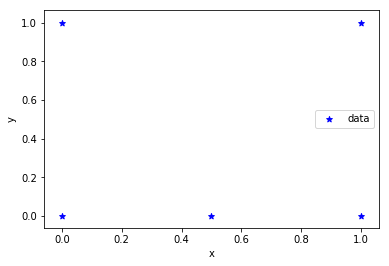

In [9]:
plt.scatter([0,0.5,1,1,0],[0,0,0,1,1],c='b',marker='*',label='data')

plt.legend(numpoints=1,loc=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
def circle_fit(A):
    ones = -1*np.ones(A.shape[1])
    Atilde = np.transpose(np.vstack((2*A,ones)))
    b = np.transpose(np.linalg.norm(A, axis = 0))**2
    y = np.linalg.solve(Atilde.transpose()@Atilde, Atilde.transpose()@b)
    x = y[:2]
    r = np.sqrt(np.linalg.norm(x)**2 - y[2])
    return x, r

In [26]:
A = np.stack((a1,a2,a3,a4,a5), axis = -1)

In [27]:
x,r = circle_fit(A)

In [28]:
print("Center: (", x[0], ",", x[1], ")")
print("Radius: " , r)

Center: ( 0.5000000000000002 , 0.5416666666666669 )
Radius:  0.6782841915041545


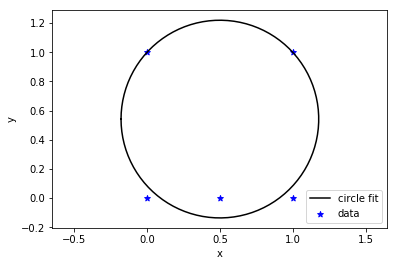

In [29]:
plt.scatter([0,0.5,1,1,0],[0,0,0,1,1],c='b',marker='*',label='data')

theta = np.linspace(0, 2*np.pi, 100)
xcircle = x[0]-r*np.cos(theta)
ycircle = x[1]-r*np.sin(theta)
plt.plot(xcircle, ycircle, c='k', label='circle fit')

plt.legend(numpoints=1,loc=4)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Problem 4

(Beck Exercise 4.3) Consider the quadratic minimization problem 
$$\min\{x^tAx: x \in \mathbb R^5\}$$
where $A$ is the $5 \times 5$ Hilbert matrix defined by 
$$A_{i,j} = \frac{1}{i+j-1} \ \ for \ \ i,j = 1,2,3,4,5$$
Run the following methods and compare the number of iterations required by each of the methods when the initial vector is $x_0 = (1,2,3,4,5)^t$ to obtain a solution $x$ with $||\nabla f(x)|| \leq 10^{-4}$:

* Gradient method with backtracking stepsize rule and parameters $\alpha = 0.5, \beta = 0.5, s = 1$.
* Gradient method with backtracking stepsize rule and parameters $\alpha = 0.1, \beta = 0.5, s = 1$.
* Gradient method with exact line search.
* Diagonally scaled gradient method with diagonal elements $D_{ii} = \frac{1}{A_{ii}}, i = 1, \dots, 5$ and exact line search.
* Diagonally scaled gradient method with diagonal elements $D_{ii} = \frac{1}{A_{ii}}, i = 1, \dots, 5$ and backtracking line search with parameters $\alpha = 0.1, \beta = 0.5, s = 1$.

Construct a Hilbert Matrix:

In [15]:
A = 1/(np.arange(5).reshape((5,1)) + np.arange(5)+1)
A

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111]])

Gradient method with backtracking stepsize rule and parameters $\alpha = 0.5, \beta = 0.5, s = 1$. Total iterations: **256**

In [16]:
def gradient_method_backtracking(f,g,x0,s,alpha,beta,epsilon):
    """
    Gradient method with backtracking stepsize rule
    INPUT
    =======================================
    f ......... objective function
    g ......... gradient of the objective function
    x0......... initial point
    s ......... initial choice of stepsize
    alpha ..... tolerance parameter for the stepsize selection
    beta ...... the constant in which the stepsize is multiplied 
                at each backtracking step (0<beta<1)
    epsilon ... tolerance parameter for stopping rule
    OUTPUT
    =======================================
    x ......... optimal solution (up to a tolerance) 
                of min f(x)
    fun_val ... optimal function value
    """
    x=x0
    grad=g(x)
    fun_val=f(x)
    iter=0
    while (norm(grad)>epsilon):
        iter=iter+1
        t=s
        while (fun_val-f(x-t*grad)<alpha*t*norm(grad)**2):
            t=beta*t
        x=x-t*grad
        fun_val=f(x)
        grad=g(x)
        print('iter_number = '+ str(iter) + ' norm_grad = ' + str(norm(grad)) + ' fun_val = ' + str(fun_val))
    return x,fun_val

In [17]:
f = lambda x: x@A@x
g = lambda x: 2*A@x
x0 = np.array([1,2,3,4,5])
s = 1
alpha = 0.5 
beta = 0.5
epsilon = 10e-4 

gradient_method_backtracking(f,g,x0,s,alpha,beta,epsilon)

iter_number = 1 norm_grad = 3.7161697124989153 fun_val = 6.111554793948738
iter_number = 2 norm_grad = 1.8551045311412817 fun_val = 3.6976103890244048
iter_number = 3 norm_grad = 1.7800167868742083 fun_val = 1.616987694126046
iter_number = 4 norm_grad = 0.9551407388835023 fun_val = 1.049374773243598
iter_number = 5 norm_grad = 0.8590941130264057 fun_val = 0.46414011147866374
iter_number = 6 norm_grad = 0.49467772917224506 fun_val = 0.3283226750120244
iter_number = 7 norm_grad = 0.419312016785863 fun_val = 0.1634241532117249
iter_number = 8 norm_grad = 0.28477092876059656 fun_val = 0.1179358908223216
iter_number = 9 norm_grad = 0.20510329986122058 fun_val = 0.09222469829490021
iter_number = 10 norm_grad = 0.15536290997984514 fun_val = 0.0767118441009251
iter_number = 11 norm_grad = 0.15326899313368605 fun_val = 0.06156191845220749
iter_number = 12 norm_grad = 0.0896740786626487 fun_val = 0.05723005581697865
iter_number = 13 norm_grad = 0.08427784849503729 fun_val = 0.05135463411777212
i

(array([-0.02015248,  0.22241378, -0.35218487, -0.20854722,  0.39325981]),
 0.00012398681977154828)

Gradient method with backtracking stepsize rule and parameters $\alpha = 0.1, \beta = 0.5, s = 1$. Total iterations : **275**

In [18]:
alpha = 0.1 

gradient_method_backtracking(f,g,x0,s,alpha,beta,epsilon)

iter_number = 1 norm_grad = 8.501354675951443 fun_val = 14.595754638128033
iter_number = 2 norm_grad = 4.911275094719191 fun_val = 5.792195109970798
iter_number = 3 norm_grad = 2.8824976236963615 fun_val = 2.5665542509357056
iter_number = 4 norm_grad = 1.7374410317585303 fun_val = 1.2816415124346392
iter_number = 5 norm_grad = 1.0902868625267403 fun_val = 0.7129598077612544
iter_number = 6 norm_grad = 0.7207643472882183 fun_val = 0.43234123620441284
iter_number = 7 norm_grad = 1.087843736423688 fun_val = 0.34463323683352
iter_number = 8 norm_grad = 0.6411518362613607 fun_val = 0.18340679550780054
iter_number = 9 norm_grad = 0.389780046913079 fun_val = 0.11779454134316716
iter_number = 10 norm_grad = 0.24862959207503024 fun_val = 0.08776905058042044
iter_number = 11 norm_grad = 0.16905172483892347 fun_val = 0.07222655002981948
iter_number = 12 norm_grad = 0.24521563788947168 fun_val = 0.06490735872571085
iter_number = 13 norm_grad = 0.14950359583758918 fun_val = 0.05582430762746654
iter

(array([-0.02137311,  0.22502235, -0.34978573, -0.2096384 ,  0.38862275]),
 0.00011906741798362542)

Gradient method with exact line search. Total iterations: **99**

In [19]:
def gradient_method_quadratic(A,b,x0,epsilon):
    """
    INPUT
    ======================
    A ....... the positive definite matrix associated with the objective function
    b ....... a column vector associated with the linear part of the objective function 
    x0 ...... starting point of the method
    epsilon . tolerance parameter
    OUTPUT
    =======================
    x ....... an optimal solution (up to a tolerance) of min(x^T A x+2 b^T x)
    fun_val . the optimal function value up to a tolerance
    """
    x=x0
    iter=0
    grad=2*(A@x+b)
    while (norm(grad)>epsilon):
        iter=iter+1
        t=norm(grad)**2/(2*grad@A@grad)
        x=x-t*grad
        grad=2*(A@x+b)
        fun_val=x@A@x+2*b@x
        print('iter_number = '+ str(iter) + ' norm_grad = ' + str(norm(grad)) + ' fun_val = ' + str(fun_val))
    return x,fun_val

In [20]:
b = np.zeros((5,))

gradient_method_quadratic(A,b,x0,epsilon)

iter_number = 1 norm_grad = 1.87564142512312 fun_val = 4.20601985247335
iter_number = 2 norm_grad = 1.5407352593729349 fun_val = 0.49131094737381986
iter_number = 3 norm_grad = 0.20053602812497276 fun_val = 0.1052407452615002
iter_number = 4 norm_grad = 0.18449017740278403 fun_val = 0.06044659259776196
iter_number = 5 norm_grad = 0.05322649067433343 fun_val = 0.054557189938974585
iter_number = 6 norm_grad = 0.15510463812647324 fun_val = 0.049635624361907986
iter_number = 7 norm_grad = 0.04781162682519835 fun_val = 0.045429416793370064
iter_number = 8 norm_grad = 0.1401948437737715 fun_val = 0.04163156457175674
iter_number = 9 norm_grad = 0.04369005801859373 fun_val = 0.03818892177585101
iter_number = 10 norm_grad = 0.12836224104121355 fun_val = 0.03503727389824898
iter_number = 11 norm_grad = 0.04005856731035227 fun_val = 0.03215055736799893
iter_number = 12 norm_grad = 0.11772464520744624 fun_val = 0.02950311276608096
iter_number = 13 norm_grad = 0.03674519497778355 fun_val = 0.027074

(array([-0.01983721,  0.2215878 , -0.3544568 , -0.20841243,  0.39634389]),
 0.00012727750217402157)

Diagonally scaled gradient method with diagonal elements $D_{ii} = \frac{1}{A_{ii}}, i = 1, \dots, 5$ and exact line search. Total iterations: **129**

In [21]:
def gradient_scaled_quadratic(A,b,D,x0,epsilon):
    """
    INPUT
    ======================
    A ....... the positive definite matrix associated with the objective function
    b ....... a column vector associated with the linear part of the objective function 
    D ....... scaling matrix
    x0 ...... starting point of the method
    epsilon . tolerance parameter
    OUTPUT
    =======================
    x ....... an optimal solution (up to a tolerance) of min(x^T A x+2 b^T x)
    fun_val . the optimal function value up to a tolerance
    """

    x=x0
    iter=0
    grad=2*(A@x+b)
    while (norm(grad)>epsilon):
        iter=iter+1
        t=grad@D@grad/(2*(grad@D.transpose())@A@(D@grad))
        x=x-t*D@grad
        grad=2*(A@x+b)
        fun_val=x@A@x+2*b@x
        print('iter_number = '+ str(iter) + ' norm_grad = ' + str(norm(grad)) + ' fun_val = ' + str(fun_val))
    return x,fun_val

In [22]:
D = np.diag(1/np.diag(A))

gradient_scaled_quadratic(A,b,D,x0,epsilon)

iter_number = 1 norm_grad = 0.25386008027852625 fun_val = 0.051479997186053145
iter_number = 2 norm_grad = 0.02671463794320059 fun_val = 0.003260623898240571
iter_number = 3 norm_grad = 0.016230453644183598 fun_val = 0.003118370135660683
iter_number = 4 norm_grad = 0.025119698041762607 fun_val = 0.0029825276044120816
iter_number = 5 norm_grad = 0.015443504673175637 fun_val = 0.002852742353931208
iter_number = 6 norm_grad = 0.023788554684821942 fun_val = 0.00272867344543723
iter_number = 7 norm_grad = 0.01473179082709946 fun_val = 0.0026100481341161993
iter_number = 8 norm_grad = 0.022620876271091207 fun_val = 0.0024966047480473857
iter_number = 9 norm_grad = 0.014070209298237815 fun_val = 0.002388110173325633
iter_number = 10 norm_grad = 0.021562230894666294 fun_val = 0.0022843411757235777
iter_number = 11 norm_grad = 0.013446868585260556 fun_val = 0.0021850897548465905
iter_number = 12 norm_grad = 0.020582104190455034 fun_val = 0.002090156870337054
iter_number = 13 norm_grad = 0.01285

(array([ 0.00310597,  0.01293016, -0.04657742, -0.04097384,  0.08147248]),
 1.3412102833808864e-05)

Diagonally scaled gradient method with diagonal elements $D_{ii} = \frac{1}{A_{ii}}, i = 1, \dots, 5$ and backtracking line search with parameters $\alpha = 0.1, \beta = 0.5, s = 1$. Total iterations: **59**

In [23]:
def dscaled_gradient_method_backtracking(D,f,g,x0,s,alpha,beta,epsilon):
    """
    Diagonally scaled gradient method with backtracking stepsize rule
    INPUT
    =======================================
    D ......... diagonal matrix
    f ......... objective function
    g ......... gradient of the objective function
    x0......... initial point
    s ......... initial choice of stepsize
    alpha ..... tolerance parameter for the stepsize selection
    beta ...... the constant in which the stepsize is multiplied 
                at each backtracking step (0<beta<1)
    epsilon ... tolerance parameter for stopping rule
    OUTPUT
    =======================================
    x ......... optimal solution (up to a tolerance) 
                of min f(x)
    fun_val ... optimal function value
    """
    x=x0
    grad=g(x)
    fun_val=f(x)
    iter=0
    while (norm(grad)>epsilon):
        iter=iter+1
        t=s
        while (fun_val-f(x-t*D@grad)<alpha*t*grad@D@grad):
            t=beta*t
        x=x-t*D@grad
        fun_val=f(x)
        grad=g(x)
        print('iter_number = '+ str(iter) + ' norm_grad = ' + str(norm(grad)) + ' fun_val = ' + str(fun_val))
    return x,fun_val

In [24]:
dscaled_gradient_method_backtracking(D,f,g,x0,s,alpha,beta,epsilon)

iter_number = 1 norm_grad = 1.831167700074242 fun_val = 0.54267003765792
iter_number = 2 norm_grad = 0.17807031515152827 fun_val = 0.04508822398716738
iter_number = 3 norm_grad = 0.3481258895814844 fun_val = 0.03227201459896886
iter_number = 4 norm_grad = 0.1242450206177381 fun_val = 0.01856615869436541
iter_number = 5 norm_grad = 0.19443806018219442 fun_val = 0.009867631207790077
iter_number = 6 norm_grad = 0.030019559020428847 fun_val = 0.002928754534535598
iter_number = 7 norm_grad = 0.027154457292576 fun_val = 0.0028413331877093035
iter_number = 8 norm_grad = 0.015391779164936774 fun_val = 0.002652768161571287
iter_number = 9 norm_grad = 0.024295265931554216 fun_val = 0.0022858489907433073
iter_number = 10 norm_grad = 0.012936639567868648 fun_val = 0.002139088027081549
iter_number = 11 norm_grad = 0.021359312087178617 fun_val = 0.0018404118271235371
iter_number = 12 norm_grad = 0.029359104618035384 fun_val = 0.0017979097315159462
iter_number = 13 norm_grad = 0.010478854832405002 fu

(array([ 0.00364787,  0.01179884, -0.04764654, -0.04065795,  0.08376629]),
 1.5219053390740259e-05)